# 🔷 Havayolu Yolcu Memnuniyeti Analizi
**Veri Sözlüğü **

**Gender:**
Yolcunun cinsiyeti (Kadın, Erkek)

**Customer Type:**
Yolcunun bağlılık durumu (Sadık müşteri, Sadık olmayan müşteri)

**Age:**
Yolcunun yaşı

**Type of Travel:**
Yolcunun uçuş amacı (Kişisel seyahat, İş seyahati)

**Class:**
Uçakta tercih edilen seyahat sınıfı (Business, Ekonomi, Ekonomi Plus)

**Flight Distance:**
Uçuşun uzaklığı (mil cinsinden)

**Inflight wifi service:**
Uçak içi Wi-Fi hizmetinden memnuniyet seviyesi (0: Geçerli değil; 1-5 arası puan)

**Departure/Arrival time convenient:**
Kalkış ve varış zamanlarının uygunluğu için verilen memnuniyet puanı (1-5)

**Ease of Online booking:**
Online bilet alma işleminin kolaylığına verilen memnuniyet puanı (1-5)

**Gate location:**
Kapı konumundan duyulan memnuniyet (1-5)

**Food and drink:**
İkram edilen yiyecek ve içeceklerin kalitesine verilen memnuniyet puanı (1-5)

**Online boarding:**
Online biniş sürecine verilen memnuniyet puanı (1-5)

**Seat comfort:**
Koltuk konforuna verilen memnuniyet puanı (1-5)

**Inflight entertainment:**
Uçak içi eğlence sisteminden duyulan memnuniyet (1-5)

**On-board service:**
Uçuş esnasındaki genel hizmet kalitesi (1-5)

**Leg room service:**
Diz mesafesine yönelik verilen memnuniyet puanı (1-5)

**Baggage handling:**
Bagaj işlemlerine yönelik verilen memnuniyet puanı (1-5)

**Check-in service:**
Check-in sürecine yönelik verilen memnuniyet puanı (1-5)

**Inflight service:**
Uçuş sırasında verilen hizmetlerin genel değerlendirmesi (1-5)

**Cleanliness:**
Uçağın temizlik durumu için verilen memnuniyet puanı (1-5)

**Departure Delay in Minutes:**
Kalkışta yaşanan gecikme süresi (dakika cinsinden)

**Arrival Delay in Minutes:**
Varışta yaşanan gecikme süresi (dakika cinsinden)

**Satisfaction:**
Yolcunun genel memnuniyet durumu (Memnun, Nötr/Memnun değil)

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from scipy import stats
from sklearn.ensemble import IsolationForest

In [109]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [110]:
train.shape

(103904, 25)

In [111]:
test.shape

(25976, 25)

In [112]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [113]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [114]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [115]:
train = train.drop(train.iloc[:,[0, 1]], axis = 1)

Şimdi modellemeyi daha kolay hale getirmek için veri tipi dönüşümü yapacağım. Veri seti içindeki kategorik değişkenleri belirleyip sayısal değişken vs kategorik değişken ayrımı yapacağım.

In [116]:
categorical_cols = ['Gender','Customer Type','Type of Travel','Class','Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking','Gate location','Food and drink','Online boarding','Seat comfort','Inflight entertainment',
    'On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness','satisfaction']


In [117]:
for col in categorical_cols:
    train[col] = train[col].astype('category')
train.dtypes

,0
Gender,category
Customer Type,category
Age,int64
Type of Travel,category
Class,category
Flight Distance,int64
Inflight wifi service,category
Departure/Arrival time convenient,category
Ease of Online booking,category
Gate location,category


# **İstatiksel Özet**

In [118]:
# Temel istatistikler
train.describe() # count, mean, std, min, 25%, 50%, 75%, max

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,14.815618,15.178678
std,15.114964,997.147281,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


**Veri setindeki sayısal değişkenlerin istatistiksel özeti**


*   Yaş değişkeni, 7 ile 85 arasında değişmekte olup ortalama 39.4 ve medyan 40 ile simetrik ve dengeli bir dağılım sergilemektedir.
*   Uçuş mesafesi ise geniş bir aralıkta dağılım göstermekte (min: 31 km, max: 4983 km) ve ortalama 1189 km ile medyan değeri olan 843 km’den belirgin şekilde yüksek olması, bu değişkenin sağa çarpık (positively skewed) bir dağılıma sahip olduğunu göstermektedir. Bunun için aykırı değer (outlier) analizi gerekiyor.

*   Gecikme değişkenleri (Departure Delay, Arrival Delay) aşırı çarpık, birçok 0 değerin yanı sıra çok büyük gecikmeler var. Bu nedenle aykırı değer tespiti gerekiyor.

In [119]:
train.describe(include = ['category'])

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
count,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904
unique,2,2,2,3,6,6,6,6,6,6,6,6,6,6,5,6,6,6,2
top,Female,Loyal Customer,Business travel,Business,3,4,3,3,4,4,4,4,4,4,4,4,4,4,neutral or dissatisfied
freq,52727,84923,71655,49665,25868,25546,24449,28577,24359,30762,31765,29423,30867,28789,37383,29055,37945,27179,58879


**Kategorik Değişkenlerin İstatiksel Özeti**

In [120]:
# Satisfaction ile alakalı olan değişkenler için ayrı bir tablo oluşturacağız
satisfaction_related = ['Gender', 'Customer Type', 'Type_of_Travel', 'Class','Seat comfort', 'Leg room service', ]

# Tüm kategorik değişkenler için frekans analizi
for col in categorical_cols:
    print(f"\n{'='*50}")
    print(f"{col.upper()} DEĞİŞKENİ ANALİZİ")
    print(f"{'='*50}")

    # Frekans tablosu
    freq_table = train[col].value_counts().reset_index()
    freq_table.columns = ['Kategori', 'Frekans']
    freq_table['Yüzde'] = (freq_table['Frekans'] / len(train) * 100).round(2)


    styled_table = freq_table.style.format({
        'Frekans': '{:,}',
        'Yüzde': '{:.2f}%'
    }).background_gradient(subset=['Frekans'], cmap='Blues')

    display(styled_table)

    print(f"\n Özet İstatistikler:")
    print(f"   • Benzersiz değer sayısı: {train[col].nunique()}")
    print(f"   • En sık görülen: {train[col].mode().iloc[0]}")
    print(f"   • Eksik değer: {train[col].isnull().sum()}")

    # Satisfaction ile alakalı değişkenler için çapraz tablo
    if col in satisfaction_related:
        print(f"\n {col} Kategorilerinin Memnuniyet Dağılımı:")
        print("   (Her kategorinin yüzde kaçı memnun/memnun değil)")

        # Satır yüzdesi - her kategori kendi içinde yüzde kaçı memnun
        crosstab_row = pd.crosstab(train[col], train['satisfaction'], normalize='index') * 100
        crosstab_styled = crosstab_row.style.format('{:.1f}%').background_gradient(cmap='Oranges')
        display(crosstab_styled)


GENDER DEĞİŞKENİ ANALİZİ


,Kategori,Frekans,Yüzde
0,Female,"52,727",50.75%
1,Male,"51,177",49.25%



 Özet İstatistikler:
   • Benzersiz değer sayısı: 2
   • En sık görülen: Female
   • Eksik değer: 0

 Gender Kategorilerinin Memnuniyet Dağılımı:
   (Her kategorinin yüzde kaçı memnun/memnun değil)


satisfaction,neutral or dissatisfied,satisfied
Gender,,
Female,57.3%,42.7%
Male,56.1%,43.9%



CUSTOMER TYPE DEĞİŞKENİ ANALİZİ


,Kategori,Frekans,Yüzde
0,Loyal Customer,"84,923",81.73%
1,disloyal Customer,"18,981",18.27%



 Özet İstatistikler:
   • Benzersiz değer sayısı: 2
   • En sık görülen: Loyal Customer
   • Eksik değer: 0

 Customer Type Kategorilerinin Memnuniyet Dağılımı:
   (Her kategorinin yüzde kaçı memnun/memnun değil)


satisfaction,neutral or dissatisfied,satisfied
Customer Type,,
Loyal Customer,52.3%,47.7%
disloyal Customer,76.3%,23.7%



TYPE OF TRAVEL DEĞİŞKENİ ANALİZİ


,Kategori,Frekans,Yüzde
0,Business travel,"71,655",68.96%
1,Personal Travel,"32,249",31.04%



 Özet İstatistikler:
   • Benzersiz değer sayısı: 2
   • En sık görülen: Business travel
   • Eksik değer: 0

CLASS DEĞİŞKENİ ANALİZİ


,Kategori,Frekans,Yüzde
0,Business,"49,665",47.80%
1,Eco,"46,745",44.99%
2,Eco Plus,"7,494",7.21%



 Özet İstatistikler:
   • Benzersiz değer sayısı: 3
   • En sık görülen: Business
   • Eksik değer: 0

 Class Kategorilerinin Memnuniyet Dağılımı:
   (Her kategorinin yüzde kaçı memnun/memnun değil)


satisfaction,neutral or dissatisfied,satisfied
Class,,
Business,30.6%,69.4%
Eco,81.4%,18.6%
Eco Plus,75.4%,24.6%



INFLIGHT WIFI SERVICE DEĞİŞKENİ ANALİZİ


,Kategori,Frekans,Yüzde
0,3,"25,868",24.90%
1,2,"25,830",24.86%
2,4,"19,794",19.05%
3,1,"17,840",17.17%
4,5,"11,469",11.04%
5,0,"3,103",2.99%



 Özet İstatistikler:
   • Benzersiz değer sayısı: 6
   • En sık görülen: 3
   • Eksik değer: 0

DEPARTURE/ARRIVAL TIME CONVENIENT DEĞİŞKENİ ANALİZİ


,Kategori,Frekans,Yüzde
0,4,"25,546",24.59%
1,5,"22,403",21.56%
2,3,"17,966",17.29%
3,2,"17,191",16.55%
4,1,"15,498",14.92%
5,0,"5,300",5.10%



 Özet İstatistikler:
   • Benzersiz değer sayısı: 6
   • En sık görülen: 4
   • Eksik değer: 0

EASE OF ONLINE BOOKING DEĞİŞKENİ ANALİZİ


,Kategori,Frekans,Yüzde
0,3,"24,449",23.53%
1,2,"24,021",23.12%
2,4,"19,571",18.84%
3,1,"17,525",16.87%
4,5,"13,851",13.33%
5,0,"4,487",4.32%



 Özet İstatistikler:
   • Benzersiz değer sayısı: 6
   • En sık görülen: 3
   • Eksik değer: 0

GATE LOCATION DEĞİŞKENİ ANALİZİ


,Kategori,Frekans,Yüzde
0,3,"28,577",27.50%
1,4,"24,426",23.51%
2,2,"19,459",18.73%
3,1,"17,562",16.90%
4,5,"13,879",13.36%
5,0,1,0.00%



 Özet İstatistikler:
   • Benzersiz değer sayısı: 6
   • En sık görülen: 3
   • Eksik değer: 0

FOOD AND DRINK DEĞİŞKENİ ANALİZİ


,Kategori,Frekans,Yüzde
0,4,"24,359",23.44%
1,5,"22,313",21.47%
2,3,"22,300",21.46%
3,2,"21,988",21.16%
4,1,"12,837",12.35%
5,0,107,0.10%



 Özet İstatistikler:
   • Benzersiz değer sayısı: 6
   • En sık görülen: 4
   • Eksik değer: 0

ONLINE BOARDING DEĞİŞKENİ ANALİZİ


,Kategori,Frekans,Yüzde
0,4,"30,762",29.61%
1,3,"21,804",20.98%
2,5,"20,713",19.93%
3,2,"17,505",16.85%
4,1,"10,692",10.29%
5,0,"2,428",2.34%



 Özet İstatistikler:
   • Benzersiz değer sayısı: 6
   • En sık görülen: 4
   • Eksik değer: 0

SEAT COMFORT DEĞİŞKENİ ANALİZİ


,Kategori,Frekans,Yüzde
0,4,"31,765",30.57%
1,5,"26,470",25.48%
2,3,"18,696",17.99%
3,2,"14,897",14.34%
4,1,"12,075",11.62%
5,0,1,0.00%



 Özet İstatistikler:
   • Benzersiz değer sayısı: 6
   • En sık görülen: 4
   • Eksik değer: 0

 Seat comfort Kategorilerinin Memnuniyet Dağılımı:
   (Her kategorinin yüzde kaçı memnun/memnun değil)


satisfaction,neutral or dissatisfied,satisfied
Seat comfort,,
0,100.0%,0.0%
1,77.7%,22.3%
2,77.6%,22.4%
3,78.8%,21.2%
4,43.9%,56.1%
5,35.0%,65.0%



INFLIGHT ENTERTAINMENT DEĞİŞKENİ ANALİZİ


,Kategori,Frekans,Yüzde
0,4,"29,423",28.32%
1,5,"25,213",24.27%
2,3,"19,139",18.42%
3,2,"17,637",16.97%
4,1,"12,478",12.01%
5,0,14,0.01%



 Özet İstatistikler:
   • Benzersiz değer sayısı: 6
   • En sık görülen: 4
   • Eksik değer: 0

ON-BOARD SERVICE DEĞİŞKENİ ANALİZİ


,Kategori,Frekans,Yüzde
0,4,"30,867",29.71%
1,5,"23,648",22.76%
2,3,"22,833",21.98%
3,2,"14,681",14.13%
4,1,"11,872",11.43%
5,0,3,0.00%



 Özet İstatistikler:
   • Benzersiz değer sayısı: 6
   • En sık görülen: 4
   • Eksik değer: 0

LEG ROOM SERVICE DEĞİŞKENİ ANALİZİ


,Kategori,Frekans,Yüzde
0,4,"28,789",27.71%
1,5,"24,667",23.74%
2,3,"20,098",19.34%
3,2,"19,525",18.79%
4,1,"10,353",9.96%
5,0,472,0.45%



 Özet İstatistikler:
   • Benzersiz değer sayısı: 6
   • En sık görülen: 4
   • Eksik değer: 0

 Leg room service Kategorilerinin Memnuniyet Dağılımı:
   (Her kategorinin yüzde kaçı memnun/memnun değil)


satisfaction,neutral or dissatisfied,satisfied
Leg room service,,
0,64.8%,35.2%
1,79.7%,20.3%
2,72.5%,27.5%
3,72.8%,27.2%
4,41.8%,58.2%
5,38.6%,61.4%



BAGGAGE HANDLING DEĞİŞKENİ ANALİZİ


,Kategori,Frekans,Yüzde
0,4,"37,383",35.98%
1,5,"27,131",26.11%
2,3,"20,632",19.86%
3,2,"11,521",11.09%
4,1,"7,237",6.97%



 Özet İstatistikler:
   • Benzersiz değer sayısı: 5
   • En sık görülen: 4
   • Eksik değer: 0

CHECKIN SERVICE DEĞİŞKENİ ANALİZİ


,Kategori,Frekans,Yüzde
0,4,"29,055",27.96%
1,3,"28,446",27.38%
2,5,"20,619",19.84%
3,2,"12,893",12.41%
4,1,"12,890",12.41%
5,0,1,0.00%



 Özet İstatistikler:
   • Benzersiz değer sayısı: 6
   • En sık görülen: 4
   • Eksik değer: 0

INFLIGHT SERVICE DEĞİŞKENİ ANALİZİ


,Kategori,Frekans,Yüzde
0,4,"37,945",36.52%
1,5,"27,116",26.10%
2,3,"20,299",19.54%
3,2,"11,457",11.03%
4,1,"7,084",6.82%
5,0,3,0.00%



 Özet İstatistikler:
   • Benzersiz değer sayısı: 6
   • En sık görülen: 4
   • Eksik değer: 0

CLEANLINESS DEĞİŞKENİ ANALİZİ


,Kategori,Frekans,Yüzde
0,4,"27,179",26.16%
1,3,"24,574",23.65%
2,5,"22,689",21.84%
3,2,"16,132",15.53%
4,1,"13,318",12.82%
5,0,12,0.01%



 Özet İstatistikler:
   • Benzersiz değer sayısı: 6
   • En sık görülen: 4
   • Eksik değer: 0

SATISFACTION DEĞİŞKENİ ANALİZİ


,Kategori,Frekans,Yüzde
0,neutral or dissatisfied,"58,879",56.67%
1,satisfied,"45,025",43.33%



 Özet İstatistikler:
   • Benzersiz değer sayısı: 2
   • En sık görülen: neutral or dissatisfied
   • Eksik değer: 0


# İstatistiksel Analiz Sonuçları

### 1. Demografik Profil Analizi

**Cinsiyet Dağılımı:**
- Kadın yolcular: %50.75 (52,727)
- Erkek yolcular: %49.25 (51,177)

Cinsiyet açısından memnuniyet oranlarında minimal fark bulunmaktadır (Kadın: %42.7 memnun, Erkek: %43.9 memnun). Bu durum, hizmet kalitesi algısının cinsiyetten bağımsız olduğunu ve genel hizmet sorunlarının demografik özelliklerden ziyade operasyonel faktörlerden kaynaklandığını göstermektedir.

### 2. Müşteri Sadakat Segmentasyonu - Kritik Bulgular

**Müşteri Tipi Dağılımı:**
- Sadık müşteriler: %81.73 (84,923)
- Sadık olmayan müşteriler: %18.27 (18,981)

Sadık müşteri grubunda %52.3 memnuniyetsizlik oranı görülürken, sadık olmayan müşterilerde bu oran %76.3'e yükseliyor. Bu veri şu durumları işaret ediyor:

- Sadık müşteriler bile %50'den fazla memnuniyetsizlik yaşıyor
- Sadık olmayan müşterilerde neredeyse 4'te 3 oranında memnuniyetsizlik
- Müşteri kaybetme riski çok yüksek seviyede

### 3. Sınıf Farkı Memnuniyet Analizi

Sınıf Performansı

**Business Class:** %69.4 memnuniyet oranı ile tek başarılı segment
**Economy Class:** %18.6 memnuniyet oranı
**Economy Plus:** %24.6 memnuniyet oranı

Economy segmentindeki %81.4'lük memnuniyetsizlik oranı, havayolunun en büyük gelir kaynağında ciddi sorunlar yaşadığını göstermektedir.

### 4. Hizmet Kalitesi Boyutları - Detaylı Performans Analizi

#### Dijital Hizmetler Performansı:
- **Inflight WiFi:** En sık 3 puan (5 üzerinden) - orta düzey performans
- **Online Booking:** En sık 3 puan - kullanıcı deneyimi iyileştirme gerekli
- **Online Boarding:** En sık 4 puan - nispeten başarılı

#### Fiziksel Konfor ve Hizmet Kalitesi:

**Seat Comfort Kritik Analizi:**
- Puan 4-5 alanında: %56.1-65.0 memnuniyet oranı
- Puan 1-3 alanında: %21.2-22.4 memnuniyet oranı
- Koltuk konforu memnuniyetin en güçlü belirleyicilerinden biri

**Leg Room Service Kritik Analizi:**
- Puan 4-5 alanında: %58.2-61.4 memnuniyet oranı
- Puan 1-3 alanında: %20.3-35.2 memnuniyet oranı
- Benzer pattern - fiziksel konfor kritik başarı faktörü

#### Operasyonel Hizmetler:
- **Food and Drink:** Dengeli dağılım (4-5 puan %44.91) - iyileştirme potansiyeli
- **Baggage Handling:** İyi performans (%62.09 yüksek puan)
- **Inflight Service:** Güçlü performans (%62.62 yüksek puan)
- **Cleanliness:** Orta-iyi performans (%47.98 yüksek puan)

### 5. Genel Memnuniyet Durumu - Stratejik Değerlendirme

**Memnuniyet Dağılımı:**
- Memnuniyetsiz/Nötr: %56.67 (58,879)
- Memnun: %43.33 (45,025)

Bu oranlar sektör standartlarının altında ve rekabet dezavantajı yaratmaktadır.

# Stratejik Öneriler

## Economy Class Deneyimi
- Koltuk konforu ve leg room iyileştirmesi
- Hizmet kalitesi standardizasyonu

## Müşteri Sadakati
- %52.3'lük memnuniyetsizlik oranına acil müdahale
- Özel hizmet paketleri ve telafi mekanizmaları

## Dijital Altyapı
- WiFi kalitesi ve hızı iyileştirmesi
- Mobile app ve online platform geliştirme

## Yiyecek & İçecek
- Menü çeşitliliği ve kalite artışı
- Özel diyet seçenekleri

## Fleet Modernizasyonu
- Yeni nesil koltuk sistemleri
- Genişletilmiş leg room konfigürasyonları


Bu analiz, havayolunun müşteri deneyiminde köklü değişiklikler yapması gerektiğini açıkça ortaya koymaktadır. %56.67'lik memnuniyetsizlik oranı sürdürülebilir değildir ve acil müdahale gerektirmektedir.

**En Yüksek Etki Yaratacak Aksiyonlar:**
1. Economy class fiziksel konfor iyileştirmeleri
2. Sadık müşteri deneyimi özel programları
3. Dijital hizmet platformlarının modernizasyonu


# **Eksik Değer Analizi**

In [121]:
missing = train.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing_percent = (missing / len(train)) * 100

pd.DataFrame({'Missing Values': missing, 'Percentage': missing_percent})

,Missing Values,Percentage
Arrival Delay in Minutes,310,0.298352


“Arrival Delay in Minutes” değişkeninde 310 eksik değer bulunmaktadır ve bu eksiklik veri setinin yalnızca %0.30’unu oluşturmaktadır. Eksik oranı oldukça düşük olduğu için analiz üzerinde önemli bir etkisi olması beklenmez. Eksik verileri medyan ile dolduracağım.

In [122]:
train['Arrival Delay in Minutes'].fillna(train['Arrival Delay in Minutes'].median(axis = 0), inplace = True)

In [123]:
train.isnull().sum()

,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Gate location,0


# **Aykırı Değer (Outlier) Analizi**

In [124]:
# 1. IQR Yöntemi (En yaygın)
def detect_outliers_iqr(train, column):
    Q1 = train[column].quantile(0.25)
    Q3 = train[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = train[(train[column] < lower_bound) | (train[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

In [125]:
#İlk önce aykı değer analizi yapacağımız sayısal değişklerimizi yazıyorum.
numerical_cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

print("AYKIRI DEĞER ANALİZİ")
print("=" * 60)

# Genel Aykırı Değer Özeti
print("\n AYKIRI DEĞER ÖZET RAPORU")
print("-" * 45)
#Kapsamlı bir aykırı değer analizi istediğim için IQR ve Z-Score metodlarını uygulayacağım.
outlier_summary = {}
for col in numerical_cols:
    # IQR Metodu
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_iqr = train[(train[col] < lower_bound) | (train[col] > upper_bound)]

    # Z-Score Metodu
    z_scores = np.abs(stats.zscore(train[col].dropna()))
    outliers_zscore = train[z_scores > 3]

    outlier_summary[col] = {
        'IQR_Outliers': len(outliers_iqr),
        'IQR_Percentage': f"{(len(outliers_iqr) / len(train) * 100):.1f}%",
        'ZScore_Outliers': len(outliers_zscore),
        'ZScore_Percentage': f"{(len(outliers_zscore) / len(train) * 100):.1f}%",
        'Min_Value': train[col].min(),
        'Max_Value': train[col].max(),
        'Lower_Bound': round(lower_bound, 2),
        'Upper_Bound': round(upper_bound, 2)
    }

summary_df = pd.DataFrame(outlier_summary).T
print(summary_df.to_string())

# Detaylı Değişken Analizi
print(f"\n DEĞIŞKEN BAZLI ANALİZ")
print("=" * 50)

for col in numerical_cols:
    print(f"\n {col.upper()}")
    print("-" * 30)

    # IQR hesaplamaları
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    outliers = train[(train[col] < lower_bound) | (train[col] > upper_bound)]

    # İstatistik bilgilerine bakmıştık burada da aykırı değerleri daha net analiz etmek için üstünden geçelim
    print(f" Temel İstatistikler:")
    print(f"   • Ortalama: {train[col].mean():.2f}")
    print(f"   • Medyan: {train[col].median():.2f}")
    print(f"   • Std Sapma: {train[col].std():.2f}")
    print(f"   • Min: {train[col].min():.2f}")
    print(f"   • Max: {train[col].max():.2f}")

    print(f"\n Aykırı Değer Bilgileri:")
    print(f"   • Toplam aykırı değer: {len(outliers)} ({(len(outliers)/len(train)*100):.1f}%)")
    print(f"   • Alt sınır: {lower_bound:.2f}")
    print(f"   • Üst sınır: {upper_bound:.2f}")

    if len(outliers) > 0:
        print(f"   • En küçük aykırı: {outliers[col].min():.2f}")
        print(f"   • En büyük aykırı: {outliers[col].max():.2f}")

    # Çarpıklık analizi
    skewness = train[col].skew()
    print(f"\n Dağılım Analizi:")
    print(f"   • Çarpıklık (Skewness): {skewness:.3f}")
    if abs(skewness) < 0.5:
        skew_desc = "Normal dağılıma yakın"
    elif abs(skewness) < 1:
        skew_desc = "Orta düzeyde çarpık"
    else:
        skew_desc = "Yüksek çarpıklık"
    print(f"   • Dağılım durumu: {skew_desc}")


print(f"\n ÇOK BOYUTLU AYKIRI DEĞER ANALİZİ")
print("-" * 45)

numeric_data = train[numerical_cols].dropna()

# Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42, n_estimators=100)
outlier_labels = iso_forest.fit_predict(numeric_data)
outlier_scores = iso_forest.decision_function(numeric_data)

train_clean = train.dropna(subset=numerical_cols)
train_clean.loc[:, 'outlier_score'] = outlier_scores
train_clean.loc[:, 'is_outlier'] = outlier_labels == -1

print(f" Çok Boyutlu Analiz Sonuçları:")
print(f"   • Toplam analiz edilen kayıt: {len(train_clean):,}")
print(f"   • Tespit edilen aykırı değer: {sum(train_clean['is_outlier']):,}")
print(f"   • Aykırı değer oranı: {(sum(train_clean['is_outlier'])/len(train_clean)*100):.2f}%")


most_outliers = train_clean.nsmallest(10, 'outlier_score')[numerical_cols + ['outlier_score']]
print(f"\n En Aykırı 10 Kayıt:")
print(most_outliers.round(2).to_string())


print(f"\n ÖNERİLER VE DEĞERLENDİRME")
print("=" * 45)

high_outlier_vars = []
for col in numerical_cols:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_count = len(train[(train[col] < Q1 - 1.5*IQR) | (train[col] > Q3 + 1.5*IQR)])
    outlier_pct = (outlier_count / len(train)) * 100

    if outlier_pct > 5:
        high_outlier_vars.append((col, outlier_pct))

if high_outlier_vars:
    print(" Yüksek Aykırı Değer Oranına Sahip Değişkenler:")
    for var, pct in high_outlier_vars:
        print(f"   • {var}: %{pct:.1f}")
    print("\n Öneriler:")
    print("   • Bu değişkenler için log transformation düşünülebilir")
    print("   • Winsorization (cap/floor) uygulanabilir")
else:
    print(" Genel olarak aykırı değer oranları kabul edilebilir seviyede")

print(f"\n Model Performansı İçin:")
print("   • Aykırı değerler modelin performansını etkileyebilir")
print("   • Robust algoritmalar (Random Forest, XGBoost) tercih edilebilir")
print("   • Feature scaling öncesi aykırı değer işleme yapılması önerilir")

print(f"\n" + "="*60)
print("="*60)

AYKIRI DEĞER ANALİZİ

 AYKIRI DEĞER ÖZET RAPORU
---------------------------------------------
                           IQR_Outliers IQR_Percentage ZScore_Outliers ZScore_Percentage Min_Value Max_Value Lower_Bound Upper_Bound
Age                                   0           0.0%              17              0.0%         7        85        -9.0        87.0
Flight Distance                    2291           2.2%              58              0.1%        31      4983     -1579.5      3736.5
Departure Delay in Minutes        14529          14.0%            2222              2.1%         0      1592       -18.0        30.0
Arrival Delay in Minutes          13954          13.4%            2225              2.1%       0.0    1584.0       -19.5        32.5

 DEĞIŞKEN BAZLI ANALİZ

 AGE
------------------------------
 Temel İstatistikler:
   • Ortalama: 39.38
   • Medyan: 40.00
   • Std Sapma: 15.11
   • Min: 7.00
   • Max: 85.00

 Aykırı Değer Bilgileri:
   • Toplam aykırı değer: 0 (0.0%)
   •

“Departure Delay in Minutes” ve “Arrival Delay in Minutes” değişkenlerinde sırasıyla %14.0 ve %13.4 oranında yüksek aykırı değer tespit edilmiştir. Bu durum, uçuşların çoğunun zamanında gerçekleşmesine karşın az sayıda uçuşta aşırı gecikmeler yaşandığını göstermektedir. Bu tür uç değerler, özellikle ortalama değerleri ve model performansını olumsuz etkileyebilir. Bu nedenle, dağılımı daha dengeli hale getirmek adına bu değişkenlere **logaritmik dönüşüm** uygulanması veya uç değerlerin üst/alt sınırlarla sınırlandırılması (**Winsorization**) önerilmektedir.

Modelleme aşamasında ise aykırı değerlere duyarlı olmayan algoritmalar (örneğin **Random Forest** veya **XGBoost**) tercih edilerek modelin bu etkilerden daha az zarar görmesi sağlanabilir. Özellikle normalleştirme veya standartlaştırma işlemleri yapılmadan önce bu aykırı değerlerin uygun şekilde işlenmesi önemlidir.

# **Görselleştirme**

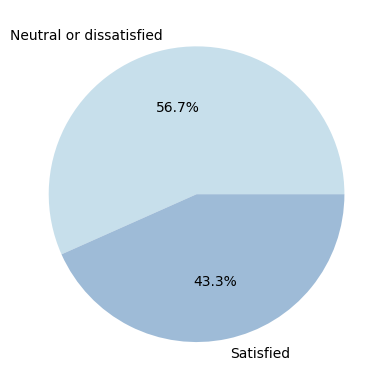

In [126]:
plt.pie(train.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("ch:s=.25,rot=-.25"), autopct = '%1.1f%%')
pass

56.7% Neutral/Dissatisfied: Bu oran sektör ortalamasının üzerinde ve kabul edilemez seviyede. Havayolunun genel performansında sistem hatası olduğunu gösteriyor.
43.3% Satisfied: Memnun müşteri oranının %50'nin altında olması, rekabet dezavantajı yaratıyor.

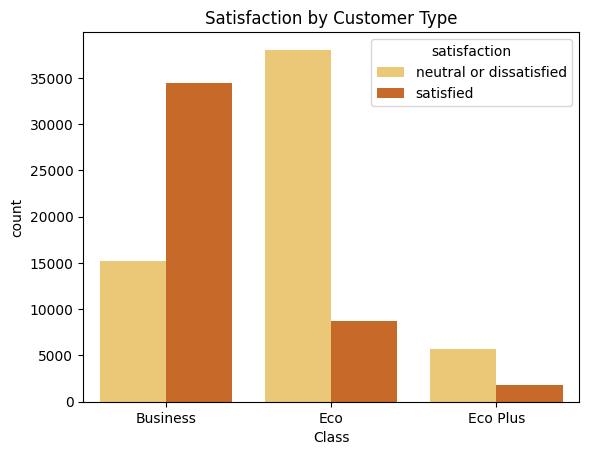

In [127]:
sns.countplot(data=train, x='Class', hue='satisfaction', palette = "YlOrBr")
plt.title("Satisfaction by Customer Type")
plt.show()


Business Class: Yüksek hacim, yüksek memnuniyet oranı. Premium hizmetlerin etkisini gösteriyor.
Economy Class: En yüksek hacimli segment ama memnuniyetsizlik dominant. Kârlılığın temel kaynağı olan bu segmentte acil iyileştirmeler gerekli.
Economy Plus: Düşük hacim, düşük memnuniyet. Bu segment stratejik olarak yeniden değerlendirilmeli - ya güçlendirilmeli ya da kaldırılmalı.
Economy segmentindeki memnuniyetsizlik oranının bu kadar yüksek olması, marka imajı ve rekabet gücü açısından risk oluşturuyor.

<Axes: xlabel='AgeGroup', ylabel='count'>

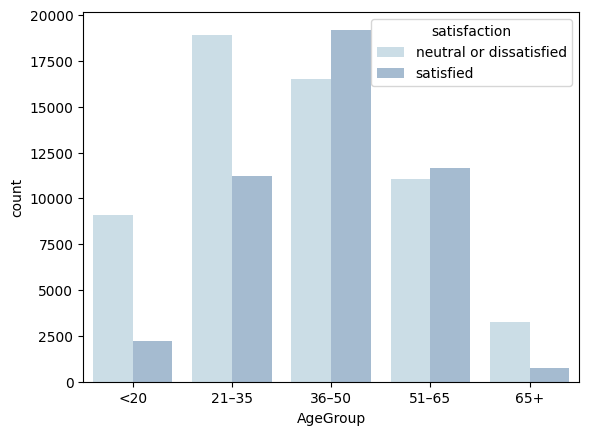

In [128]:
train['AgeGroup'] = pd.cut(train['Age'], bins=[0, 20, 35, 50, 65, 100],
                           labels=['<20', '21–35', '36–50', '51–65', '65+'])
sns.countplot(data=train, x='AgeGroup', hue='satisfaction', palette=sns.color_palette("ch:s=.25,rot=-.25"))


21-35 Yaş Grubu: En yüksek hacimli segment ama memnuniyetsizlik oranı yüksek. Bu yaş grubu muhtemelen fiyat-performans odaklı ve eleştirel yaklaşımda.

36-50 Yaş Grubu: Dengeli bir profil sergiliyor. Orta yaş segmenti daha toleranslı ve memnuniyet oranları dengeli.

65+ Yaş Grubu: En düşük hacimli segment ama memnuniyetsizlik oranı da düşük. Yaşlı yolcular hizmet beklentilerinde daha esnek.

Genç yetişkin segmentine yönelik özel iyileştirmelerin (teknoloji entegrasyonu, hızlı servis) önceliklendirilmesi stratejik açıdan önemli bir adım olur.

<Axes: >

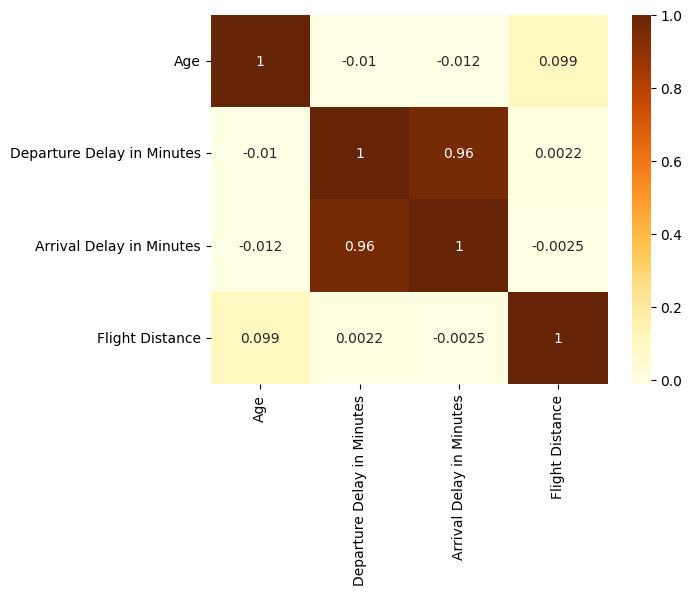

In [161]:
features = ['Age', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
corr = train[features + ['Flight Distance'] ].corr()
sns.heatmap(corr, annot=True, cmap='YlOrBr')

Departure ve Arrival delay'lerin neredeyse mükemmel korelasyonu (0.96), havayolunun operasyonel zincir etkisini gösteriyor. Havayolunun müşterilerinin uçuşu kalkışta belirli bir süre geciktiyse, uçuş inişte de yaklaşık olarak aynı süre gecikecektir. Bir gecikmeden kaçınmak, domino etkisini önleyerek genel performansı dramatik şekilde iyileştirir.
On-time performance'a odaklanmak, hem kalkış hem iniş memnuniyetini aynı anda artıracak en etkili strateji olacaktır.

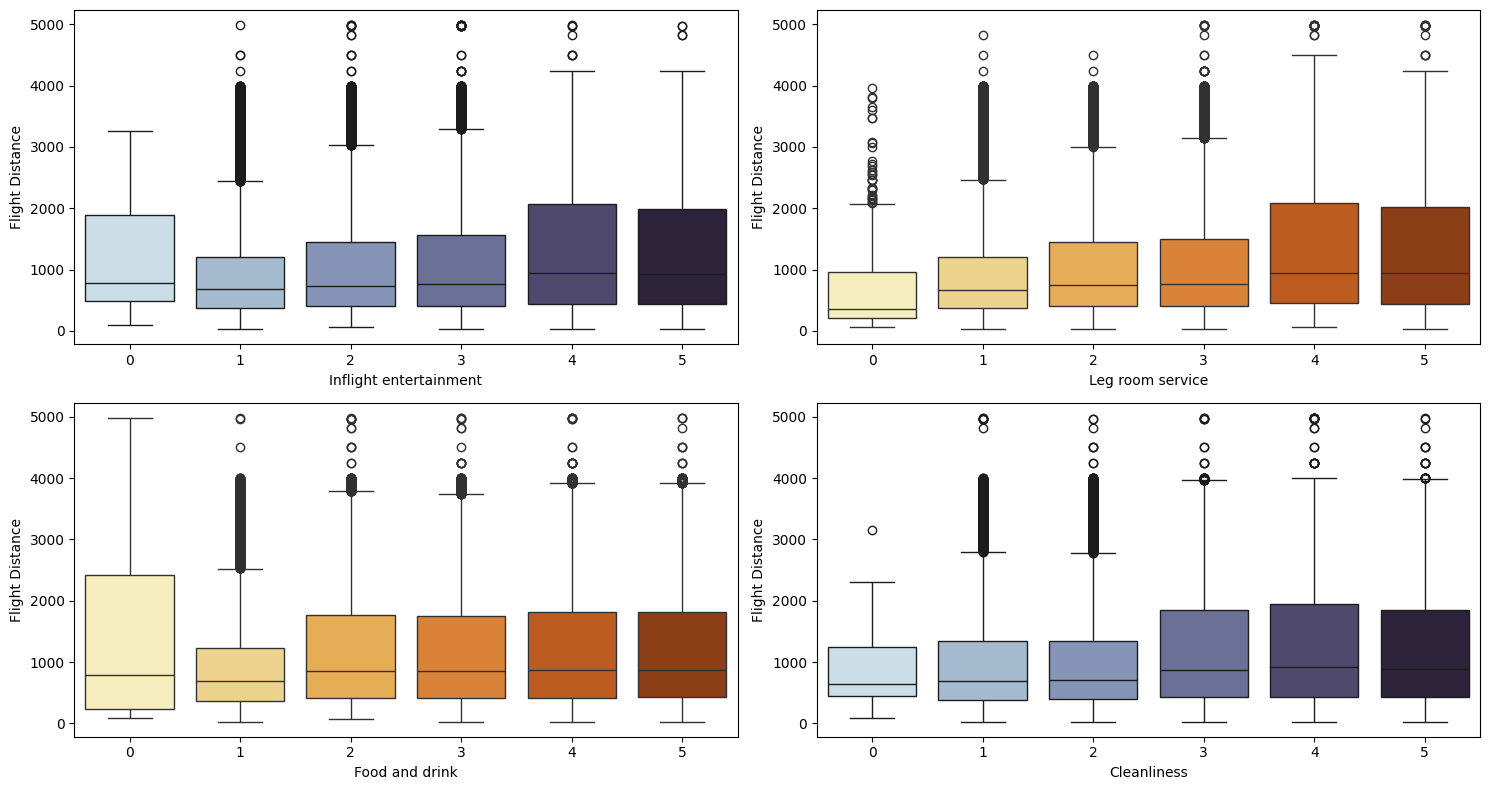

In [157]:
f, ax = plt.subplots(2, 2, figsize=(15, 8))

sns.boxplot(x="Inflight entertainment", y="Flight Distance", palette=sns.color_palette("ch:s=.25,rot=-.25"), data=train, ax=ax[0, 0])

sns.boxplot(x="Leg room service", y="Flight Distance", palette="YlOrBr", data=train, ax=ax[0, 1])

sns.boxplot(x="Food and drink", y="Flight Distance", palette="YlOrBr", data=train, ax=ax[1, 0])

sns.boxplot(x="Cleanliness", y="Flight Distance", palette=sns.color_palette("ch:s=.25,rot=-.25"), data=train, ax=ax[1, 1])


plt.tight_layout()
plt.show()


Inflight Entertainment kategorisinde havayolu oldukça başarılı bir performans sergiliyor. Medyan değeri 4 seviyesinde ve varyans oldukça dar, bu da eğlence sistemlerinde tutarlı bir kalite standardı yakalandığını gösteriyor. Yolcular bu konuda genel olarak memnun ve hizmet kalitesi öngörülebilir düzeyde.
Leg Room Service konusunda ise ciddi sorunlar var. Medyan değeri 2 civarında ve oldukça geniş bir varyans gözlemleniyor. Bu durum, koltuk konforunun havayolunun en zayıf noktalarından biri olduğunu ve yolcu memnuniyetsizliğinin temel kaynaklarından birini oluşturduğunu gösteriyor.
Food and Drink hizmetleri havayolunun en problematik alanı olarak öne çıkıyor. Medyan değeri 1.5 civarında ve tutarlı şekilde düşük skorlar alıyor. Bu kategori, köklü bir revizyon ve yeniden tasarım gerektiren kritik bir iyileştirme alanı.
Cleanliness açısından havayolu istikrarlı bir performans gösteriyor. Medyan 2 seviyesinde ve çok dar varyans ile temizlik standartlarının tutarlı olduğunu ancak geliştirilebileceğini ortaya koyuyor.
Flight Distance analizi ise ilginç bir trend ortaya çıkarıyor. Uçuş mesafesi arttıkça memnuniyet seviyelerinde belirgin bir artış gözlemleniyor. Kısa mesafe uçuşlarda medyan değerler 600-800 mil civarındayken, uzun mesafe uçuşlarda 1800-2000 mil seviyelerine çıkıyor. Bu durum, uzun uçuşlarda daha kapsamlı hizmet sunulduğunu ve yolcuların bu hizmetlerden faydalanma fırsatı bulduğunu gösteriyor.

# **Analiz Çıkarımları**
Bu analiz sürecinde en çarpıcı bulgu, bir havayolunun %56.7'lik memnuniyetsizlik oranıyla ayakta kalmaya çalışması oldu. Özellikle sadık müşterilerin bile yarısından fazlasının memnuniyetsiz olması, sektörün ne kadar zorlu olduğunu gözler önüne seriyor.
Veriler açık şekilde gösteriyor ki sorun tek bir alanda değil - Economy sınıfındaki fiziksel konfordan yiyecek kalitesine, Wi-Fi hizmetinden gecikmeli uçuşlara kadar sistematik bir iyileştirme gerekiyor. Ama en umut verici nokta şu: veriler aynı zamanda neyin işe yaradığını da gösteriyor. Business sınıfındaki %69.4'lük memnuniyet oranı, doğru yaklaşımla başarının mümkün olduğunu kanıtlıyor.
Sonuç olarak, bu havayolu için önümüzdeki dönem hayati önemde. Ya köklü değişimlerle müşteri deneyimini yeniden inşa edecekler ya da rekabet ortamında geride kalacaklar. Veriler rotayı gösteriyor, artık aksiyona geçme zamanı.